In [ ]:

"""
PHISHING EMAIL DETECTION USING MACHINE LEARNING AND DEEP LEARNING
==================================================================

This comprehensive tutorial demonstrates:
1. Natural Language Processing (NLP) for email text
2. Traditional Machine Learning algorithms
3. Deep Learning with Neural Networks (RNN, LSTM, GRU)
4. Model comparison and evaluation

Author: Educational Version
Purpose: Teaching ML/DL concepts with real-world application
"""

# =============================================================================
# 1. IMPORT REQUIRED LIBRARIES
# =============================================================================

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter


# Natural Language Processing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
from wordcloud import WordCloud
import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer, CountVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from scipy.sparse import hstack, csr_matrix

# Traditional Machine Learning Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

# Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, Dense, Dropout,
                                   LSTM, GRU, SimpleRNN, Bidirectional)

# Model evaluation and preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, f1_score, classification_report,
                           confusion_matrix, ConfusionMatrixDisplay)








[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
import requests
from io import StringIO

# Method 1: Using gdown library (recommended for public files)
# First install: pip install gdown
import gdown

# Extract file ID from your Google Drive link
file_id = "1VEgGI6cNsCUQJAjfkOP8XnHbxuw1t0xA"
url = f"https://drive.google.com/uc?id={file_id}"

# Download and read the file
output_path = "Phishing_Email.csv"
gdown.download(url, output_path, quiet=False)
df = pd.read_csv(output_path)

print("Data loaded successfully!")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Downloading...
From: https://drive.google.com/uc?id=1VEgGI6cNsCUQJAjfkOP8XnHbxuw1t0xA
To: /content/Phishing_Email.csv
100%|██████████| 52.0M/52.0M [00:01<00:00, 33.2MB/s]


Data loaded successfully!
   Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB
None

Missing Values:
Unnamed: 0     0
Email Text    16
Email Type    

In [ ]:
df.shape

(18650, 3)

In [ ]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
print("\nClass balance:")
print(df["Email Type"].value_counts(dropna=False))


Class balance:
Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64


In [ ]:

# =============================================================================
# 3. DATA CLEANING AND PREPROCESSING
# =============================================================================

def clean_dataset(df):
    """
    Clean the dataset by removing unnecessary columns, null values, and duplicates

    Args:
        df (pd.DataFrame): Raw dataset

    Returns:
        pd.DataFrame: Cleaned dataset
    """
    print("\n🧹 Cleaning dataset...")

    # Remove unnamed index column (often created when saving CSV files)
    if "Unnamed: 0" in df.columns:
        df.drop(["Unnamed: 0"], axis=1, inplace=True)
        print("   ✓ Removed unnamed index column")

    # Remove rows with missing values
    initial_rows = len(df)
    df.dropna(inplace=True, axis=0)
    print(f"   ✓ Removed {initial_rows - len(df)} rows with missing values")

    # Remove duplicate entries
    initial_rows = len(df)
    df.drop_duplicates(inplace=True)
    print(f"   ✓ Removed {initial_rows - len(df)} duplicate rows")

    print(f"   📊 Final dataset shape: {df.shape}")

    return df


In [ ]:
# Clean the dataset
df = clean_dataset(df)


🧹 Cleaning dataset...
   ✓ Removed unnamed index column
   ✓ Removed 16 rows with missing values
   ✓ Removed 1096 duplicate rows
   📊 Final dataset shape: (17538, 2)


📌 text_length — Outlier range: < 52.0 or > 15743.290000000085
Outlier count: 348


,text_length,Email Type,Email Text
54,5,Phishing Email,empty
106,5,Safe Email,empty
237,35,Safe Email,please review for send out monday .
271,33,Safe Email,congratulations - well deserved .
274,39,Phishing Email,she looks good click here to be removed


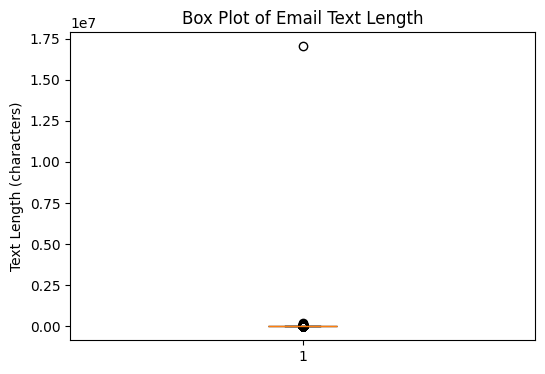

In [ ]:
df["text_length"] = df["Email Text"].astype(str).str.len()

q_low, q_hi = df["text_length"].quantile([0.01, 0.99])
outliers = df[(df["text_length"] < q_low) | (df["text_length"] > q_hi)]

print(f"📌 text_length — Outlier range: < {q_low} or > {q_hi}")
print(f"Outlier count: {len(outliers)}")
if not outliers.empty:
    display(outliers[["text_length", "Email Type", "Email Text"]].head(5))

plt.figure(figsize=(6,4))
plt.boxplot(df["text_length"], vert=True, patch_artist=True)
plt.title("Box Plot of Email Text Length")
plt.ylabel("Text Length (characters)")
plt.show()

In [ ]:
q_low, q_hi = df["text_length"].quantile([0.01, 0.99])

# Filter out outliers
df = df[(df["text_length"] >= q_low) & (df["text_length"] <= q_hi)].reset_index(drop=True)

print(f"✅ DataFrame shape after removing text_length outliers: {df.shape}")

✅ DataFrame shape after removing text_length outliers: (17190, 3)


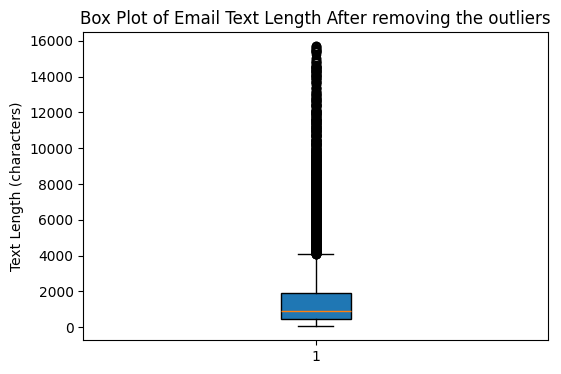

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(df["text_length"], vert=True, patch_artist=True)
plt.title("Box Plot of Email Text Length After removing the outliers")
plt.ylabel("Text Length (characters)")
plt.show()

In [ ]:
df.head()

,Email Text,Email Type,text_length
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,1030
1,the other side of * galicismos * * galicismo *...,Safe Email,479
2,re : equistar deal tickets are you still avail...,Safe Email,1245
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,688
4,software at incredibly low prices ( 86 % lower...,Phishing Email,441


In [ ]:
# =============================================================================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================

def visualize_data_distribution(df):
    """
    Create visualizations to understand the distribution of email types

    Args:
        df (pd.DataFrame): Dataset to visualize
    """
    print("\n📊 Creating data visualizations...")

    # Count the distribution of email types
    email_counts = df['Email Type'].value_counts()
    print(f"Email type distribution:\n{email_counts}")

    # 1. Bar Chart - shows exact counts clearly
    fig_bar = px.bar(
        x=email_counts.index,
        y=email_counts.values,
        color=email_counts.index,
        labels={'x': 'Email Category', 'y': 'Count'},
        title="📧 Email Type Distribution (Bar Chart)",
        text=email_counts.values
    )
    fig_bar.update_traces(textposition='outside')
    fig_bar.show()

    # 2. Pie Chart - shows proportional distribution
    fig_pie = px.pie(
        names=email_counts.index,
        values=email_counts.values,
        title="🥧 Email Type Distribution (Pie Chart)"
    )
    fig_pie.show()

    # Calculate and display percentages
    total_emails = len(df)
    for email_type, count in email_counts.items():
        percentage = (count / total_emails) * 100
        print(f"   {email_type}: {count} emails ({percentage:.1f}%)")


In [ ]:
# Visualize the data distribution
visualize_data_distribution(df)


📊 Creating data visualizations...
Email type distribution:
Email Type
Safe Email        10816
Phishing Email     6374
Name: count, dtype: int64


   Safe Email: 10816 emails (62.9%)
   Phishing Email: 6374 emails (37.1%)


📌 Total emails that contain at least 1 link:


,has_link
Email Type,
Phishing Email,730
Safe Email,3295


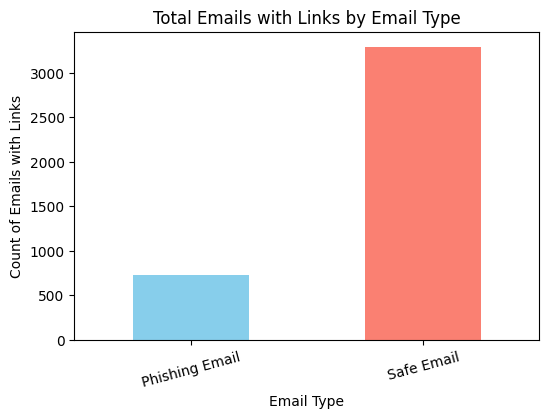

In [ ]:
# Count emails with at least 1 link
df["link_count"] = df["Email Text"].str.count(r"(https?://|www\.)")
df["has_link"] = df["link_count"] > 0

# Total counts of emails with links by Email Type
link_counts = df[df["has_link"]].groupby("Email Type")["has_link"].count()

print("📌 Total emails that contain at least 1 link:")
display(link_counts)

# Optional: Bar chart visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
link_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Total Emails with Links by Email Type")
plt.ylabel("Count of Emails with Links")
plt.xlabel("Email Type")
plt.xticks(rotation=15)
plt.show()


In [ ]:
df["sender_domain"] = df["Email Text"].str.extract(r"@([\w\.-]+\.[a-z]{2,})", expand=False)

# Example: Treat the first line as the subject if present
df["subject_line"] = df["Email Text"].str.split("\n").str[0]
df["subject_length"] = df["subject_line"].astype(str).str.len()

# Create phishing indicator
df["is_phishing"] = (df["Email Type"].str.lower().str.contains("phishing")).astype(int)

# Correlation between numeric features and phishing likelihood
num_features = ["text_length", "link_count", "subject_length"]
corr_values = df[num_features + ["is_phishing"]].corr(numeric_only=True)["is_phishing"].drop("is_phishing")

print("Correlation with Phishing Likelihood:\n")

# Frequency of top sender domains by Email Type
domain_counts = df.groupby(["sender_domain", "Email Type"]).size().unstack(fill_value=0)
print("\nTop sender domains by email type:\n")
display(domain_counts.sort_values(by=domain_counts.columns.tolist(), ascending=False).head(10))

Correlation with Phishing Likelihood:


Top sender domains by email type:



Email Type,Phishing Email,Safe Email
sender_domain,,
lists.sourceforge.net,77,304
btamail.net.cn,64,0
yahoo.com,43,10
linux.ie,41,389
netnoteinc.com,21,1
excite.com,18,0
spamassassin.taint.org,13,99
hotmail.com,9,0
aol.com,7,6


In [ ]:

# =============================================================================
# 5. TEXT PREPROCESSING FOR NLP
# =============================================================================

def preprocess_text(text):
    """
    Clean and preprocess email text for machine learning

    This function:
    - Removes hyperlinks (common in phishing emails)
    - Removes punctuation (focus on words, not grammar)
    - Converts to lowercase (ensures consistency)
    - Removes extra whitespace (clean formatting)

    Args:
        text (str): Raw email text

    Returns:
        str: Cleaned and preprocessed text
    """
    if pd.isna(text):  # Handle missing values
        return ""

    # Remove hyperlinks (pattern: http or https followed by non-whitespace)
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation (keep only alphanumeric characters and spaces)
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase for consistency
    text = text.lower()

    # Remove extra whitespace and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def apply_text_preprocessing(df):
    """
    Apply text preprocessing to the email text column

    Args:
        df (pd.DataFrame): Dataset with email text

    Returns:
        pd.DataFrame: Dataset with preprocessed text
    """
    print("\n🔤 Preprocessing email text...")

    # Show example of text before preprocessing
    print("📝 Example - Before preprocessing:")
    print(f"   {df['Email Text'].iloc[0][:100]}...")

    # Apply preprocessing function to all email texts
    df["Email Text"] = df["Email Text"].apply(preprocess_text)

    # Show example of text after preprocessing
    print("\n📝 Example - After preprocessing:")
    print(f"   {df['Email Text'].iloc[0][:100]}...")

    print("   ✅ Text preprocessing completed!")

    return df

In [ ]:
# Apply text preprocessing
df = apply_text_preprocessing(df)


🔤 Preprocessing email text...
📝 Example - Before preprocessing:
   re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson 's observations on us ...

📝 Example - After preprocessing:
   re 6 1100 disc uniformitarianism re 1086 sex lang dick hudson s observations on us use of s on but n...
   ✅ Text preprocessing completed!


In [ ]:
df.head()

,Email Text,Email Type,text_length,link_count,has_link,sender_domain,subject_line,subject_length,is_phishing
0,re 6 1100 disc uniformitarianism re 1086 sex l...,Safe Email,1030,0,False,NaN,"re : 6 . 1100 , disc : uniformitarianism , re ...",1030,0
1,the other side of galicismos galicismo is a sp...,Safe Email,479,0,False,NaN,the other side of * galicismos * * galicismo *...,479,0
2,re equistar deal tickets are you still availab...,Safe Email,1245,0,False,NaN,re : equistar deal tickets are you still avail...,1245,0
3,hello i am your hot lil horny toy i am the one...,Phishing Email,688,2,True,NaN,,0,1
4,software at incredibly low prices 86 lower dra...,Phishing Email,441,0,False,NaN,software at incredibly low prices ( 86 % lower...,441,1


In [ ]:
# =============================================================================
# 6. TEXT VISUALIZATION WITH WORD CLOUDS
# =============================================================================

def create_word_clouds(df):
    """
    Create word clouds to visualize the most common words in emails

    Word clouds help identify:
    - Most frequent terms in the dataset
    - Potential distinguishing features between phishing and safe emails

    Args:
        df (pd.DataFrame): Dataset with preprocessed text
    """
    print("\n☁️ Creating word clouds...")

    # Combine all email texts into one large string
    all_emails_text = " ".join(df['Email Text'])

    # Create word cloud with English stop words removed
    # Stop words are common words like "the", "and", "is" that don't carry much meaning
    wordcloud = WordCloud(
        stopwords="english",  # Remove common English words
        width=800,
        height=400,
        background_color='white',
        max_words=100,  # Show top 100 words
        colormap='viridis'  # Color scheme
    ).generate(all_emails_text)

    # Display the word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Remove axes
    plt.title("☁️ Most Common Words in Email Dataset", fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

    print("   ✅ Word cloud generated!")
    print("   💡 Larger words appear more frequently in the dataset")


☁️ Creating word clouds...


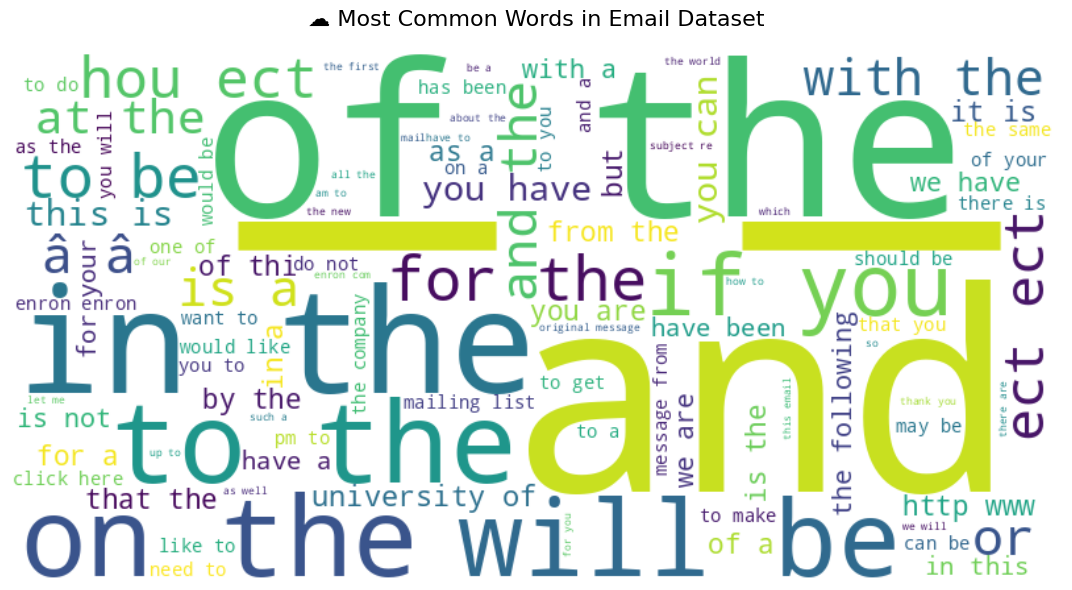

   ✅ Word cloud generated!
   💡 Larger words appear more frequently in the dataset


In [ ]:
create_word_clouds(df)

In [ ]:

stopwords = set(["the","and","to","of","in","on","at","is","are","for","a","an","i","you","me","we","it","this","that"])
tokens = df["Email Text"].astype(str).str.lower().str.findall(r"[a-z]{3,}")

flat_tokens = [t for sub in tokens for t in sub if t not in stopwords]
common_words = Counter(flat_tokens).most_common(20)

print("📝 Top 20 Most Common Words in Email Text:\n")
for word, freq in common_words:
    print(f"{word}: {freq}")

# check presence of common phishing cues
phish_cues = ["urgent","verify","account","click","login","password","free","offer"]
cue_counts = {cue: df["Email Text"].str.lower().str.contains(cue).sum() for cue in phish_cues}

print("\nPhishing Email Word Frequencies:")
for cue, count in cue_counts.items():
    print(f"{cue}: {count}")

📝 Top 20 Most Common Words in Email Text:

with: 23824
your: 23381
from: 19822
have: 19104
will: 18943
not: 16139
all: 11747
can: 11307
enron: 11204
our: 11087
ect: 10903
email: 9558
please: 9097
but: 8926
has: 8581
more: 8085
any: 8052
information: 7810
was: 7800
one: 7635

Phishing Email Word Frequencies:
urgent: 211
verify: 202
account: 1363
click: 2013
login: 74
password: 198
free: 2873
offer: 2239


In [ ]:
stop_words = set(ENGLISH_STOP_WORDS)
ps = PorterStemmer()
token_pattern = re.compile(r"[A-Za-z']{2,}")

tokens = df["Email Text"].str.lower().apply(lambda s: [t for t in token_pattern.findall(s) if t not in stop_words])
stems  = tokens.apply(lambda toks: [ps.stem(t) for t in toks])
df["cleaned_text"] = stems.apply(lambda toks: " ".join(toks))

# label
df["is_phishing"] = df["Email Type"].str.lower().str.contains("phishing").astype(int)
y = df["is_phishing"].to_numpy()

In [ ]:
# Removing repeated columns

needed_cols = ["cleaned_text","is_phishing","text_length","link_count"]
df = df[[c for c in needed_cols if c in df.columns]].copy()

In [ ]:
df.head()

,cleaned_text,is_phishing,text_length,link_count
0,disc uniformitarian sex lang dick hudson obser...,0,1030,0
1,galicismo galicismo spanish term name improp i...,0,479,0
2,equistar deal ticket avail assist robert enter...,0,1245,0
3,hello hot lil horni toy dream open mind person...,1,688,2
4,softwar incred low price lower draperi sevente...,1,441,0


In [ ]:
# TF-IDF
tfidf_vect = TfidfVectorizer(ngram_range=(1,2))
X_text = tfidf_vect.fit_transform(df["cleaned_text"])


In [ ]:
num_cols = ["text_length", "link_count"]
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[num_cols].astype(float))

In [ ]:
X_all = hstack([X_text, csr_matrix(X_num_scaled)]).tocsr()

# Train/Val/Test split: 70/15/15 stratified
# Stratified 70/15/15
X_train, X_temp, y_train, y_temp = train_test_split(
    X_num_scaled, y, test_size=0.30, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print("Shapes:", X_train.shape, X_val.shape, X_test.shape)
print("Class counts (train/val/test):", np.bincount(y_train), np.bincount(y_val), np.bincount(y_test))

Shapes: (12033, 2) (2578, 2) (2579, 2)
Class counts (train/val/test): [7571 4462] [1622  956] [1623  956]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

# Columns present
num_cols  = [c for c in ["text_length","link_count","subject_length"] if c in df.columns]
cat_cols  = [c for c in ["sender_domain"] if c in df.columns]
text_col = "cleaned_text"

# Text branch with chi2 selection
text_transformer_with_select = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(ngram_range=(1,2))), # removed min/max for simplicity
    ("chi2",  SelectKBest(chi2, k=50000))  # caps at available features
])

# Naive Bayes
text_transformer_textonly = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(ngram_range=(1,2))), # removed min/max for simplicity
    ("chi2",  SelectKBest(chi2, k=50000))
])

# Numeric features
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  StandardScaler(with_mean=False))  # keep sparse compatibility
])

# Categorical features
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe",     OneHotEncoder(handle_unknown="ignore"))
])

# Full preprocessor for LR/SVM/RF
preprocessor_full = ColumnTransformer(
    transformers=[
        ("text", text_transformer_with_select, text_col),
        ("num",  num_transformer, num_cols),
        ("cat",  cat_transformer, cat_cols),
    ],
    sparse_threshold=0.3
)

# Text-only preprocessor for Naive Bayes
preprocessor_textonly = ColumnTransformer(
    transformers=[
        ("text", text_transformer_textonly, text_col),
    ]
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)
import matplotlib.pyplot as plt
import pandas as pd

# Team mapping:
# Rashmi → Logistic Regression
lr_clf = Pipeline(steps=[
    ("prep", preprocessor_full),
    ("clf",  LogisticRegression(max_iter=1000, class_weight="balanced"))
])

In [ ]:
# Muskan → Naive Bayes
nb_clf = Pipeline(steps=[
    ("prep", preprocessor_textonly),
    ("clf",  MultinomialNB())
])

In [ ]:

# Rubel → Linear SVM
svm_clf = Pipeline(steps=[
    ("prep", preprocessor_full),
    ("clf",  CalibratedClassifierCV(LinearSVC(class_weight="balanced", random_state=42), cv=3))
])

In [ ]:

# Annu → Random Forest
rf_clf = Pipeline(steps=[
    ("prep", preprocessor_full),
    ("clf",  RandomForestClassifier(
        n_estimators=300, random_state=42, n_jobs=-1,
        class_weight="balanced_subsample"
    ))
])


=== Rashmi — LogisticRegression ===
Accuracy: 0.9736  Precision: 0.9531  Recall: 0.9770  F1: 0.9649  AUC: 0.9945628621104169


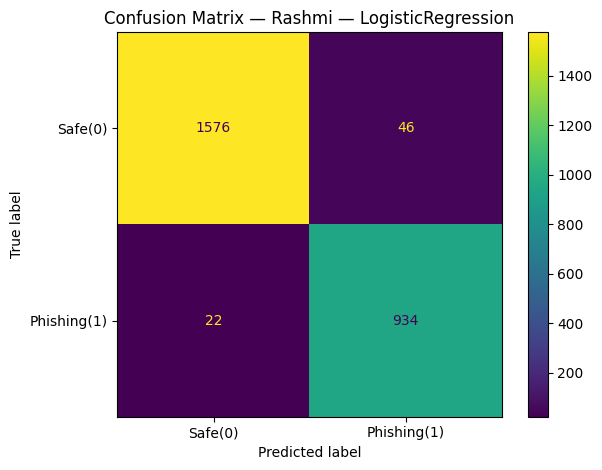


=== Muskan — MultinomialNB (text-only) ===
Accuracy: 0.9360  Precision: 0.9987  Recall: 0.8285  F1: 0.9057  AUC: 0.9978054109550172


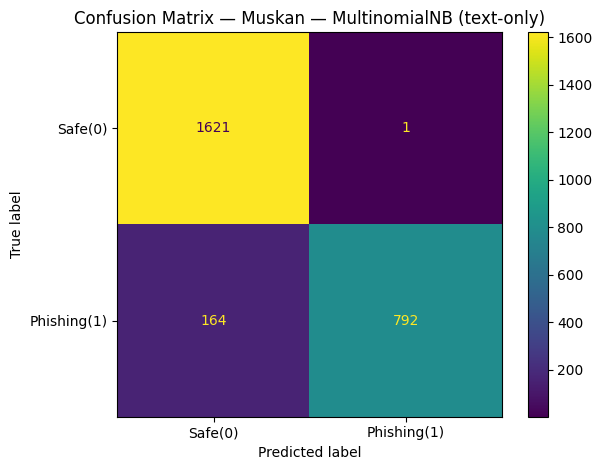

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.




=== Rubel — LinearSVM (calibrated) ===
Accuracy: 0.9853  Precision: 0.9791  Recall: 0.9812  F1: 0.9801  AUC: 0.9974094433753462


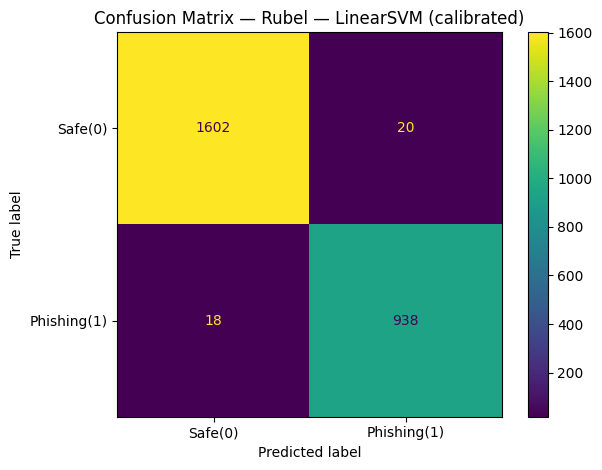


=== Annu — RandomForest ===
Accuracy: 0.9748  Precision: 0.9869  Recall: 0.9446  F1: 0.9653  AUC: 0.9979621212512059


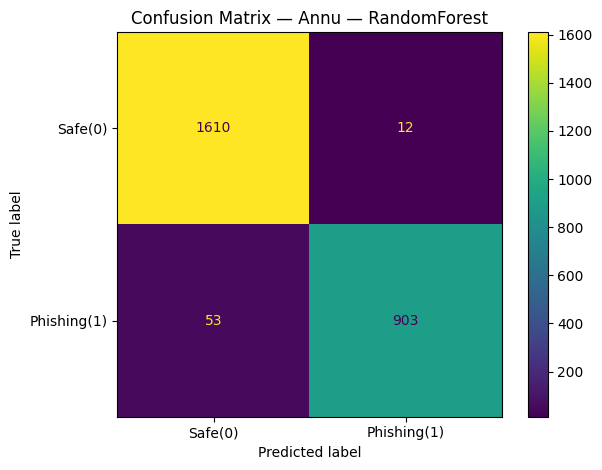


=== Validation Summary (sorted by F1 then AUC) ===


,model,accuracy,precision,recall,f1,auc
2,Rubel — LinearSVM (calibrated),0.985260,0.979123,0.981172,0.980146,0.997409
3,Annu — RandomForest,0.974787,0.986885,0.944561,0.965259,0.997962
0,Rashmi — LogisticRegression,0.973623,0.953061,0.976987,0.964876,0.994563
1,Muskan — MultinomialNB (text-only),0.935997,0.998739,0.828452,0.905660,0.997805


In [ ]:
models = [
    ("Rashmi — LogisticRegression", lr_clf),
    ("Muskan — MultinomialNB (text-only)", nb_clf),
    ("Rubel — LinearSVM (calibrated)", svm_clf),
    ("Annu — RandomForest", rf_clf),
]

def eval_model(name, pipe, Xtr, ytr, Xva, yva):
    # Passing the original dataframe to the fit method for correct column handling
    pipe.fit(df.loc[Xtr.index], ytr)
    pred = pipe.predict(Xva)

    acc  = accuracy_score(yva, pred)
    prec = precision_score(yva, pred, zero_division=0)
    rec  = recall_score(yva, pred, zero_division=0)
    f1   = f1_score(yva, pred, zero_division=0)

    # AUC scores
    auc = None
    clf = pipe.named_steps["clf"]
    if hasattr(clf, "predict_proba"):
        prob = pipe.predict_proba(Xva)[:,1]
        auc  = roc_auc_score(yva, prob)
    elif hasattr(clf, "decision_function"):
        scores = pipe.decision_function(Xva)
        auc    = roc_auc_score(yva, scores)

    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}  Precision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}  AUC: {auc if auc is not None else 'n/a'}")

    cm = confusion_matrix(yva, pred, labels=[0,1])
    ConfusionMatrixDisplay(cm, display_labels=["Safe(0)","Phishing(1)"]).plot(values_format="d")
    plt.title(f"Confusion Matrix — {name}")
    plt.tight_layout()
    plt.show()

    return {"model": name, "accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "auc": auc}

# Updating the split indices to use DataFrame indices instead of NumPy arrays
X_train_indices, X_temp_indices, y_train, y_temp = train_test_split(
    df.index, y, test_size=0.30, stratify=y, random_state=42
)
X_val_indices, X_test_indices, y_val, y_test = train_test_split(
    X_temp_indices, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)


results = [eval_model(name, pipe, df.loc[X_train_indices], y_train, df.loc[X_val_indices], y_val) for name, pipe in models]
results = pd.DataFrame(results).sort_values(by=["f1","auc"], ascending=False)
print("\n=== Validation Summary (sorted by F1 then AUC) ===")
display(results)

In [ ]:
# ================================
# CELL: Prep folds & convenience dataframes
# ================================
from sklearn.model_selection import StratifiedKFold

# Use the stratified indices you already created earlier
X_train_df = df.loc[X_train_indices].copy()
y_train_vec = y_train.copy()

X_val_df = df.loc[X_val_indices].copy()
y_val_vec = y_val.copy()

cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
RANDOM_STATE = 42


In [ ]:
# ================================
# CELL: Helper functions for metrics, thresholding & plots
# ================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_recall_curve,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

def get_proba_or_scores(pipeline, X):
    """Return (proba, scores) where:
       - proba is P(y=1) if available else None
       - scores is decision_function if available else None
    """
    clf = pipeline.named_steps["clf"]
    if hasattr(clf, "predict_proba"):
        proba = pipeline.predict_proba(X)[:, 1]
        return proba, None
    if hasattr(clf, "decision_function"):
        scores = pipeline.decision_function(X)
        return None, scores
    # As a safe fallback (rarely needed with our models):
    preds = pipeline.predict(X)
    return preds.astype(float), None

def choose_threshold_by_f1(y_true, proba, grid=np.linspace(0.05, 0.95, 19)):
    """Return threshold that maximizes F1 on y_true."""
    from sklearn.metrics import f1_score
    best_t, best_f1 = 0.5, -1.0
    for t in grid:
        y_hat = (proba >= t).astype(int)
        f1 = f1_score(y_true, y_hat, zero_division=0)
        if f1 > best_f1:
            best_f1, best_t = f1, t
    return best_t, best_f1

def plot_roc_pr(y_true, proba, model_name="Model"):
    """ROC and PR plots."""
    # ROC
    fpr, tpr, _ = roc_curve(y_true, proba)
    auc = roc_auc_score(y_true, proba)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {auc:.3f}")
    plt.plot([0,1],[0,1], ls="--")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.title(f"ROC — {model_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # PR
    precision, recall, _ = precision_recall_curve(y_true, proba)
    plt.figure(figsize=(5,4))
    plt.plot(recall, precision, lw=2)
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title(f"Precision–Recall — {model_name}")
    plt.tight_layout()
    plt.show()

def plot_confmat_and_report(y_true, y_pred, model_name="Model"):
    """Confusion matrix + classification report."""
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    ConfusionMatrixDisplay(
        cm, display_labels=["Safe(0)", "Phishing(1)"]
    ).plot(values_format="d")
    plt.title(f"Confusion Matrix — {model_name}")
    plt.tight_layout()
    plt.show()

    print(f"\n=== Classification Report — {model_name} ===")
    print(classification_report(
        y_true, y_pred,
        target_names=["Safe(0)", "Phishing(1)"],
        zero_division=0
    ))

def evaluate_best(pipeline, X_val, y_val, model_name="Model"):
    """Plots + report for a tuned pipeline using F1-optimal threshold."""
    proba, scores = get_proba_or_scores(pipeline, X_val)
    if proba is None and scores is not None:
        # Converting scores to pseudo-prob via rank scaling (rarely needed here)
        # but all our tuned models will expose predict_proba.
        s = (scores - scores.min()) / (scores.max() - scores.min() + 1e-9)
        proba = s

    # Threshold selection
    t_star, f1_star = choose_threshold_by_f1(y_val, proba)
    y_pred = (proba >= t_star).astype(int)

    # Plots
    plot_roc_pr(y_val, proba, model_name=model_name)
    plot_confmat_and_report(y_val, y_pred, model_name=model_name)

    return {"model": model_name, "threshold": t_star, "f1_val": f1_star,
            "auc_val": roc_auc_score(y_val, proba)}


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning:

k=50000 is greater than n_features=38914. All the features will be returned.



Best params (LR): {'clf__C': np.float64(6.025271171095382), 'clf__solver': 'lbfgs', 'prep__text__chi2__k': 50000, 'prep__text__tfidf__min_df': 2, 'prep__text__tfidf__ngram_range': (1, 1)}


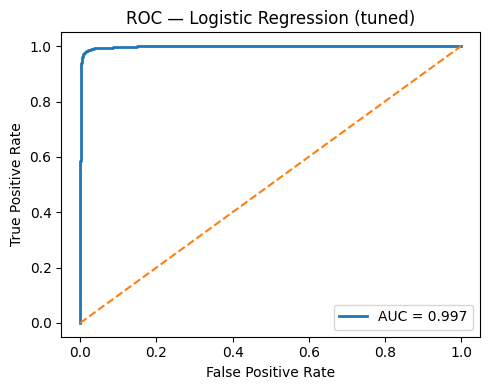

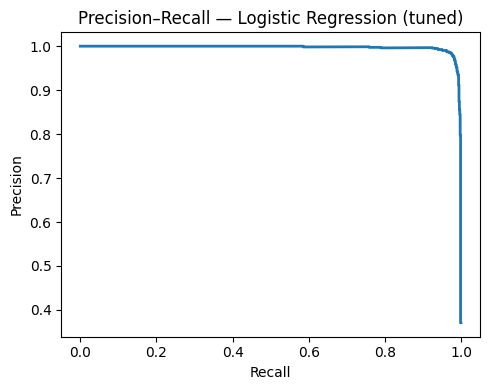

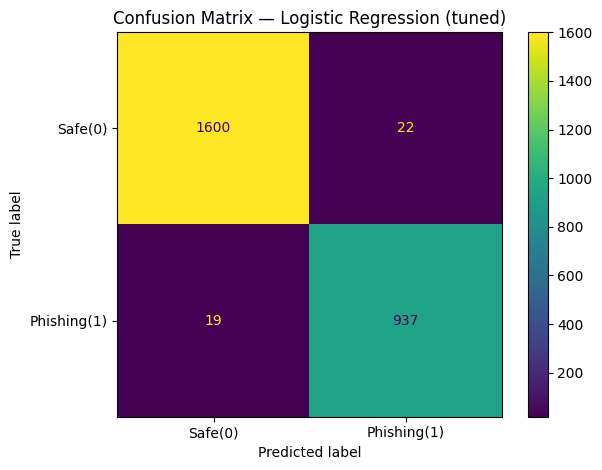


=== Classification Report — Logistic Regression (tuned) ===
              precision    recall  f1-score   support

     Safe(0)       0.99      0.99      0.99      1622
 Phishing(1)       0.98      0.98      0.98       956

    accuracy                           0.98      2578
   macro avg       0.98      0.98      0.98      2578
weighted avg       0.98      0.98      0.98      2578



{'model': 'Logistic Regression (tuned)',
 'threshold': np.float64(0.5499999999999999),
 'f1_val': 0.9785900783289817,
 'auc_val': np.float64(0.9973578515082883)}

In [ ]:
# ================================
# CELL: Tune Logistic Regression (Rashmi)
# ================================
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Reusing the pipeline 'lr_clf' we defined earlier.
# We will tune vectorizer & classifier pieces inside the pipeline.

lr_param_dist = {
    "prep__text__tfidf__ngram_range": [(1,1), (1,2)],
    "prep__text__tfidf__min_df": [1, 2, 5],
    "prep__text__chi2__k": ["all", 20000, 50000],  # keep valid vs feature count
    "clf__C": loguniform(1e-2, 1e1),               # 0.01 to 10
    "clf__solver": ["lbfgs", "liblinear"],         # both support L2 for binary
    # keep class_weight="balanced" from definition
}

lr_search = RandomizedSearchCV(
    lr_clf, lr_param_dist, n_iter=20, scoring="f1",
    cv=cv5, n_jobs=-1, random_state=RANDOM_STATE, verbose=1
)
lr_search.fit(X_train_df, y_train_vec)

print("Best params (LR):", lr_search.best_params_)
best_lr = lr_search.best_estimator_

# Evaluate on validation
lr_stats = evaluate_best(best_lr, X_val_df, y_val_vec, model_name="Logistic Regression (tuned)")
lr_stats


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best params (NB): {'clf__alpha': 0.1, 'prep__text__chi2__k': 'all', 'prep__text__tfidf__min_df': 2, 'prep__text__tfidf__ngram_range': (1, 2)}


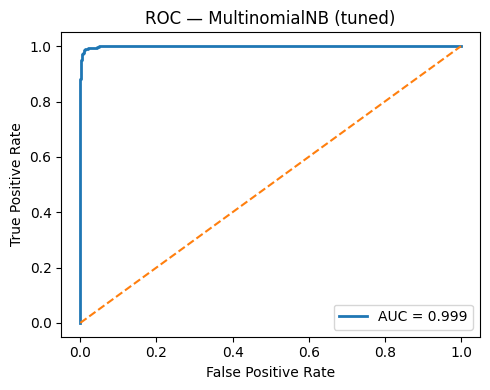

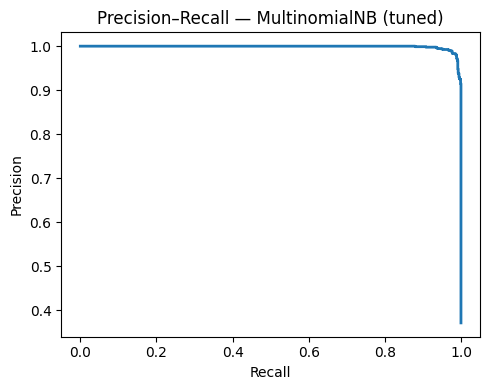

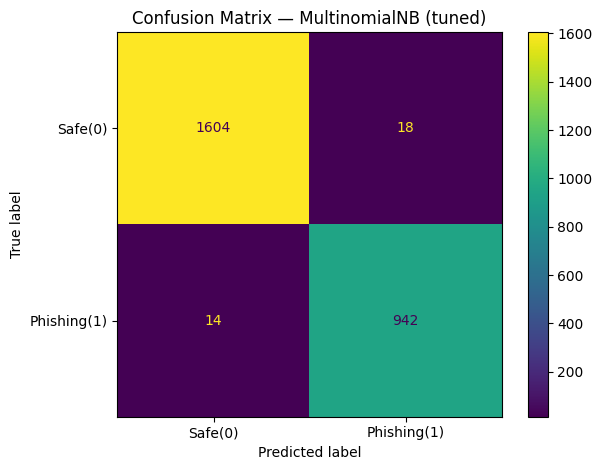


=== Classification Report — MultinomialNB (tuned) ===
              precision    recall  f1-score   support

     Safe(0)       0.99      0.99      0.99      1622
 Phishing(1)       0.98      0.99      0.98       956

    accuracy                           0.99      2578
   macro avg       0.99      0.99      0.99      2578
weighted avg       0.99      0.99      0.99      2578



{'model': 'MultinomialNB (tuned)',
 'threshold': np.float64(0.25),
 'f1_val': 0.9832985386221295,
 'auc_val': np.float64(0.9992338607741875)}

In [ ]:
# ================================
# CELL: Tune Naive Bayes (Muskan)
# ================================
from sklearn.model_selection import GridSearchCV

# Reusing 'nb_clf' (text-only). Tune TF-IDF & NB smoothing.
nb_param_grid = {
    "prep__text__tfidf__ngram_range": [(1,1), (1,2)],
    "prep__text__tfidf__min_df": [1, 2, 5],
    "prep__text__chi2__k": ["all", 20000, 50000],
    "clf__alpha": [0.1, 0.5, 1.0, 2.0]
}

nb_search = GridSearchCV(
    nb_clf, nb_param_grid, scoring="f1", cv=cv5,
    n_jobs=-1, verbose=1
)
nb_search.fit(X_train_df, y_train_vec)

print("Best params (NB):", nb_search.best_params_)
best_nb = nb_search.best_estimator_

# Evaluate on validation
nb_stats = evaluate_best(best_nb, X_val_df, y_val_vec, model_name="MultinomialNB (tuned)")
nb_stats


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Best params (SVM-Calibrated): {'clf__estimator__C': np.float64(2.752717392942941), 'clf__method': 'sigmoid', 'prep__text__chi2__k': 'all', 'prep__text__tfidf__min_df': 1, 'prep__text__tfidf__ngram_range': (1, 1)}


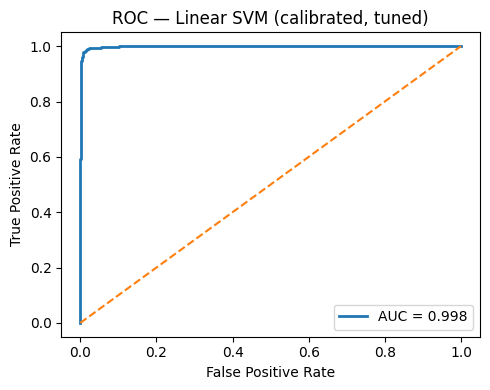

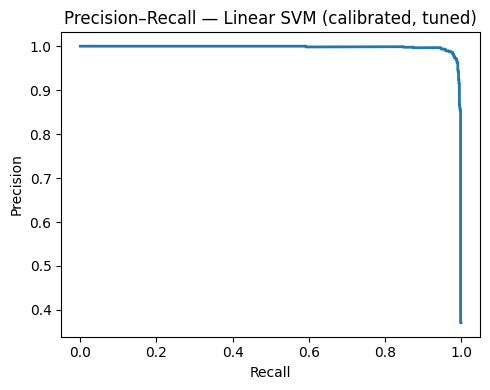

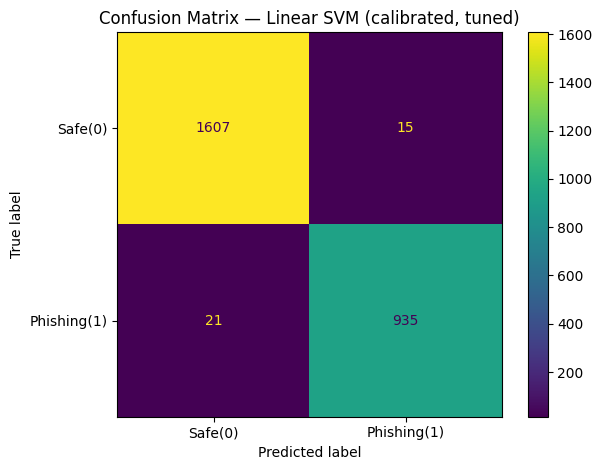


=== Classification Report — Linear SVM (calibrated, tuned) ===
              precision    recall  f1-score   support

     Safe(0)       0.99      0.99      0.99      1622
 Phishing(1)       0.98      0.98      0.98       956

    accuracy                           0.99      2578
   macro avg       0.99      0.98      0.99      2578
weighted avg       0.99      0.99      0.99      2578



{'model': 'Linear SVM (calibrated, tuned)',
 'threshold': np.float64(0.6),
 'f1_val': 0.9811122770199371,
 'auc_val': np.float64(0.9977570435796501)}

In [ ]:
# ================================
# CELL: Tune Linear SVM (Rubel) with calibration
# ================================
# Reusing 'svm_clf' (CalibratedClassifierCV(LinearSVC(...))).
# IMPORTANT: CalibratedClassifierCV uses 'estimator' as the param name.
svm_param_dist = {
    "prep__text__tfidf__ngram_range": [(1,1), (1,2)],
    "prep__text__tfidf__min_df": [1, 2, 5],
    "prep__text__chi2__k": ["all", 20000, 50000],
    "clf__estimator__C": loguniform(1e-3, 1e1),
    "clf__method": ["sigmoid", "isotonic"],  # isotonic = slower, often better-calibrated
}

svm_search = RandomizedSearchCV(
    svm_clf, svm_param_dist, n_iter=20, scoring="f1",
    cv=cv5, n_jobs=-1, random_state=RANDOM_STATE, verbose=1
)
svm_search.fit(X_train_df, y_train_vec)

print("Best params (SVM-Calibrated):", svm_search.best_params_)
best_svm = svm_search.best_estimator_

# Evaluate on validation
svm_stats = evaluate_best(best_svm, X_val_df, y_val_vec, model_name="Linear SVM (calibrated, tuned)")
svm_stats


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params (RF-fast): {'prep__text__tfidf__ngram_range': (1, 1), 'prep__text__tfidf__min_df': 3, 'prep__text__chi2__k': 12000, 'clf__n_estimators': 250, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 1, 'clf__max_samples': 0.8, 'clf__max_features': 'sqrt', 'clf__max_depth': None}


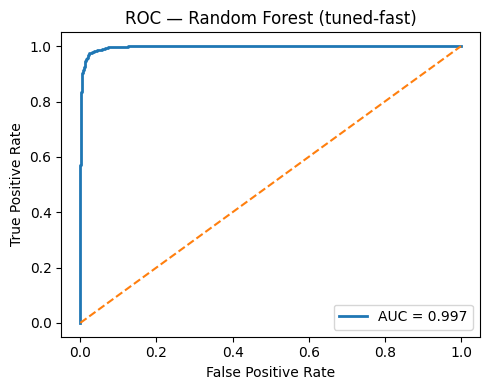

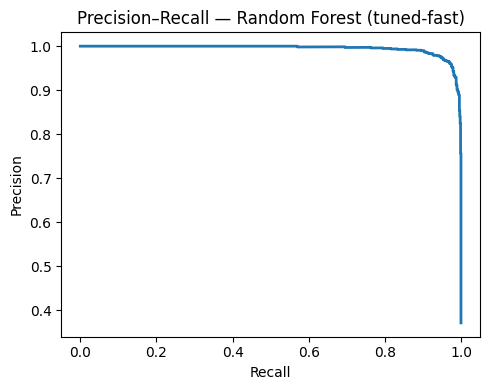

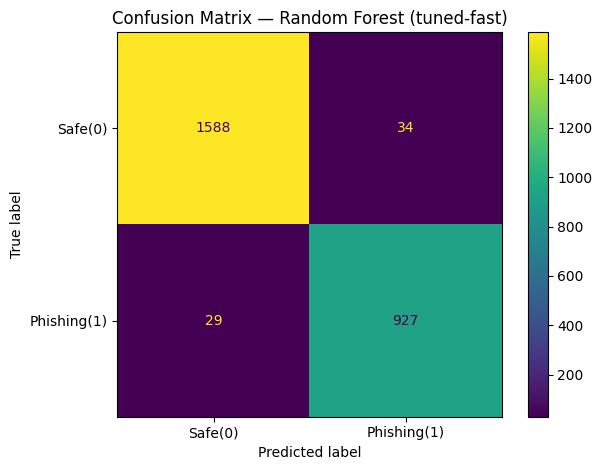


=== Classification Report — Random Forest (tuned-fast) ===
              precision    recall  f1-score   support

     Safe(0)       0.98      0.98      0.98      1622
 Phishing(1)       0.96      0.97      0.97       956

    accuracy                           0.98      2578
   macro avg       0.97      0.97      0.97      2578
weighted avg       0.98      0.98      0.98      2578

{'model': 'Random Forest (tuned-fast)', 'threshold': np.float64(0.49999999999999994), 'f1_val': 0.9671361502347418, 'auc_val': np.float64(0.9968245205825753)}


44747

In [ ]:
# ================================
# CELL: Tune Random Forest (Annu) — FAST & MEMORY-SAFE
# ================================
import numpy as np
import gc
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Cache heavy transformer steps (e.g., TF-IDF) so CV doesn't recompute them each time
_cachedir = mkdtemp(prefix="skcache_rf_")
rf_clf_cached = Pipeline(steps=rf_clf.steps, memory=Memory(_cachedir, verbose=0))

# Avoid nested parallelism: let CV use a couple of workers, but RF itself stays single-threaded
rf_clf_cached.set_params(clf__n_jobs=1)

# Tighter, cheaper search space (keeps matrices smaller → fewer densification OOMs)
rf_param_dist = {
    "prep__text__tfidf__ngram_range": [(1,1)],           # unigrams only
    "prep__text__tfidf__min_df": [3, 5, 10],             # drop rare terms
    "prep__text__chi2__k": [5000, 8000, 12000, 20000],   # cap features hard
    "clf__n_estimators": [150, 250, 350],                # fewer trees
    "clf__max_depth": [None, 20, 40],
    "clf__min_samples_split": [2, 5],
    "clf__min_samples_leaf": [1, 2],
    "clf__max_features": ["sqrt"],                       # stable, fast
    "clf__max_samples": [0.6, 0.8],                      # subsample per tree (faster & lighter)
}

rf_search = RandomizedSearchCV(
    rf_clf_cached,
    rf_param_dist,
    n_iter=10,                  # fewer trials
    scoring="f1",
    cv=3,                       # 3-fold to cut fits by ~40%
    n_jobs=2,                   # modest parallelism at CV level
    pre_dispatch=4,             # control memory footprint
    random_state=RANDOM_STATE,
    verbose=1,
    return_train_score=False,
    error_score=np.nan
)

rf_search.fit(X_train_df, y_train_vec)

print("Best params (RF-fast):", rf_search.best_params_)
best_rf = rf_search.best_estimator_

# Evaluate on validation
rf_stats = evaluate_best(best_rf, X_val_df, y_val_vec, model_name="Random Forest (tuned-fast)")
print(rf_stats)

# Clean up cache and objects to prevent lingering memory usage
rmtree(_cachedir, ignore_errors=True)
del rf_search, rf_clf_cached
gc.collect()


In [ ]:
# ================================
# CELL: Compare tuned models on the validation set
# ================================
import pandas as pd

summary = pd.DataFrame([lr_stats, nb_stats, svm_stats, rf_stats])[
    ["model", "threshold", "f1_val", "auc_val"]
].sort_values(by=["f1_val", "auc_val"], ascending=False)
summary.reset_index(drop=True, inplace=True)
summary


,model,threshold,f1_val,auc_val
0,MultinomialNB (tuned),0.25,0.983299,0.999234
1,"Linear SVM (calibrated, tuned)",0.60,0.981112,0.997757
2,Logistic Regression (tuned),0.55,0.978590,0.997358
3,Random Forest (tuned-fast),0.50,0.967136,0.996825


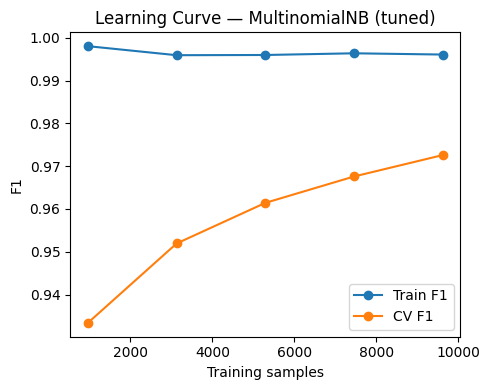

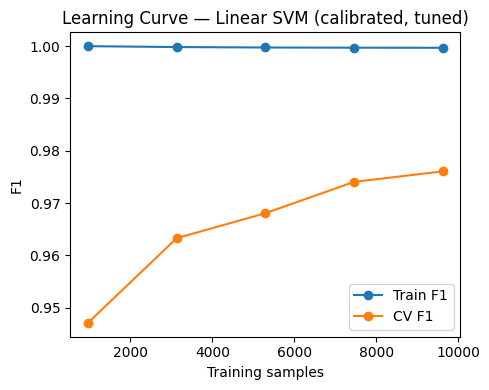

In [ ]:
# ================================
# CELL: (Optional) Learning curves for the best two models by F1
# ================================
from sklearn.model_selection import learning_curve

top2 = summary.head(2)["model"].tolist()
name_to_model = {
    "Logistic Regression (tuned)": best_lr,
    "MultinomialNB (tuned)": best_nb,
    "Linear SVM (calibrated, tuned)": best_svm,
    "Random Forest (tuned)": best_rf
}

for name in top2:
    model = name_to_model[name]
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train_df, y_train_vec,
        cv=cv5, scoring="f1", n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5), shuffle=True, random_state=RANDOM_STATE
    )
    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)

    plt.figure(figsize=(5,4))
    plt.plot(train_sizes, train_mean, marker="o", label="Train F1")
    plt.plot(train_sizes, val_mean, marker="o", label="CV F1")
    plt.xlabel("Training samples"); plt.ylabel("F1")
    plt.title(f"Learning Curve — {name}")
    plt.legend()
    plt.tight_layout()
    plt.show()


Champion model: MultinomialNB (tuned)  |  Threshold used: 0.25


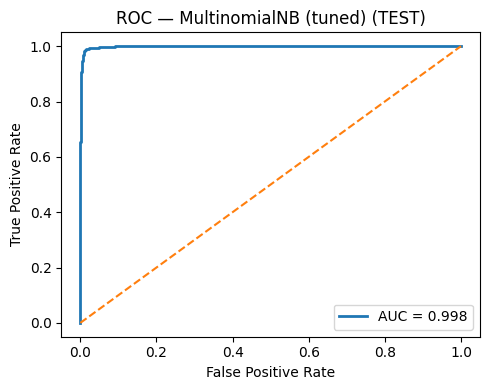

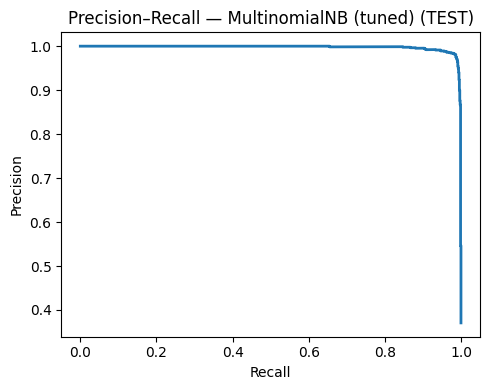

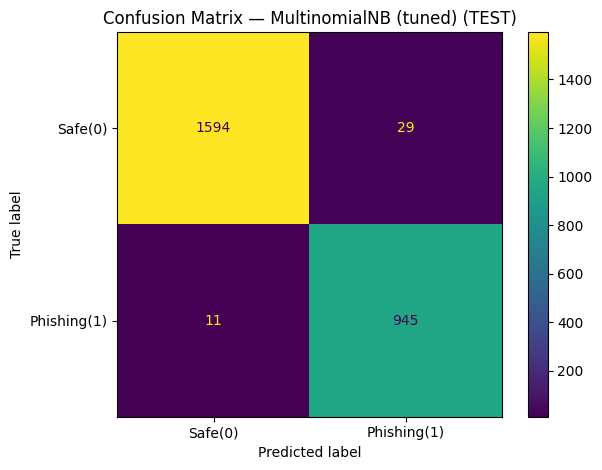


=== Classification Report — MultinomialNB (tuned) (TEST) ===
              precision    recall  f1-score   support

     Safe(0)       0.99      0.98      0.99      1623
 Phishing(1)       0.97      0.99      0.98       956

    accuracy                           0.98      2579
   macro avg       0.98      0.99      0.98      2579
weighted avg       0.98      0.98      0.98      2579



In [ ]:
# ================================
# CELL: (Optional) Lock the champion and evaluate on the held-out TEST set
# ================================
# Select the best by F1 on validation
champ_name = summary.iloc[0]["model"]
champ = name_to_model[champ_name]

X_test_df = df.loc[X_test_indices].copy()
y_test_vec = y_test.copy()

proba_test, _ = get_proba_or_scores(champ, X_test_df)
# Use the model's own optimal threshold from validation
t_opt = summary.iloc[0]["threshold"]
y_test_pred = (proba_test >= t_opt).astype(int)

print(f"Champion model: {champ_name}  |  Threshold used: {t_opt:.2f}")
plot_roc_pr(y_test_vec, proba_test, model_name=f"{champ_name} (TEST)")
plot_confmat_and_report(y_test_vec, y_test_pred, model_name=f"{champ_name} (TEST)")
